In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [2]:
N = 1024 # Cada señal tiene 1024 muestras
F = 512  # La frecuencia de muestreo es 512 Hz
T = 1/F  # Periodo

In [3]:
dataset_0 = np.load('fin5C_T.npy')
dataset = np.empty((0,900,1024))
for i in range(5):
    dataset = np.append(dataset, [dataset_0[dataset_0[:,-1]==i][:,:-1]] , axis=0)
print(f'dataset.shape = {dataset.shape}')

dataset.shape = (5, 900, 1024)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


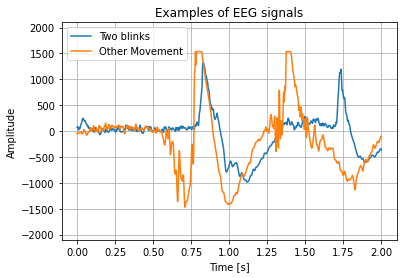

In [4]:
t = np.linspace(0.0, N*T, N)
plt.plot(t,dataset[2,0], label='Two blinks')
plt.plot(t,dataset[4,2]*0.75, label='Other Movement')
plt.grid()
plt.legend()
plt.ylim([-2100, 2100])
plt.title(f'Examples of EEG signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.savefig('figures/eeg_signals.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


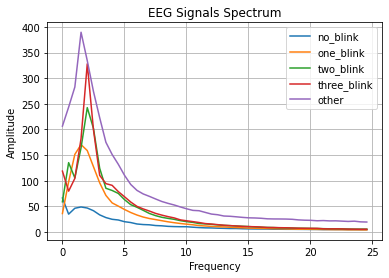

In [5]:
classes = {0:'no_blink', 1:'one_blink', 2:'two_blink', 3:'three_blink', 4:'other'}

max_x = 50
class_ = 1

for class_ in classes:
    yf = 2.0/N * np.abs(scipy.fftpack.fft(dataset[class_]))[:,:N//2]
    yf_mean = np.mean(yf,axis=0)
    yf_std = np.std(yf, axis=0)
    xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
    plt.plot(xf[:max_x], yf_mean[:max_x], label=classes[class_])
    
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('EEG Signals Spectrum')
plt.grid()
plt.savefig('img/fft.eps', format='eps')
plt.show()

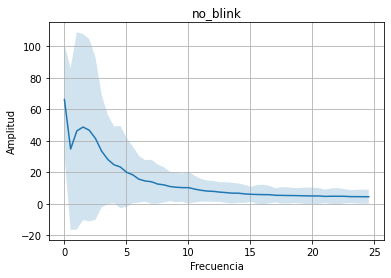

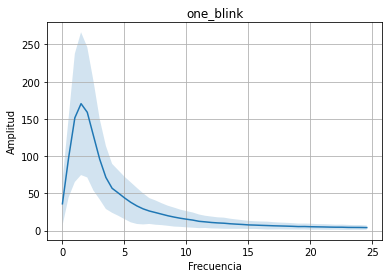

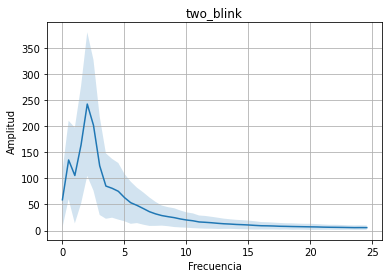

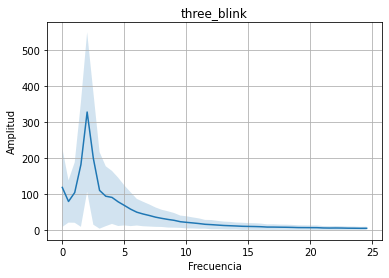

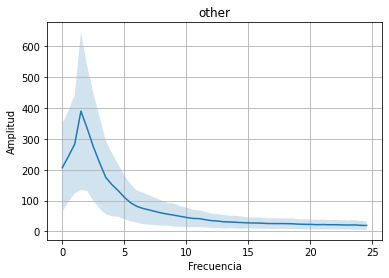

In [6]:
classes = {0:'no_blink', 1:'one_blink', 2:'two_blink', 3:'three_blink', 4:'other'}

max_x = 50
class_ = 1

for class_ in classes:
    yf = 2.0/N * np.abs(scipy.fftpack.fft(dataset[class_]))[:,:N//2]
    yf_mean = np.mean(yf,axis=0)
    yf_std = np.std(yf, axis=0)
    xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
    yf.shape

    plt.plot(xf[:max_x], yf_mean[:max_x])
    plt.fill_between(xf[:max_x], yf_mean[:max_x]-yf_std[:max_x], yf_mean[:max_x]+yf_std[:max_x], alpha=.2)
    # ax.set_xticks(np.arange(0, max_x/2, 1))
    plt.xlabel('Frecuencia')
    plt.ylabel('Amplitud')
    plt.title(classes[class_])
    plt.grid()
    plt.show()